In [24]:
import uproot3 as uproot
import matplotlib.pyplot as plt
import numpy as np


In [25]:
def reco_analysis(filename,PLOTS,INFO,ranges,info):
    file = uproot.open(filename)
    tree = file["tracksummary"] 
    
    #creating 2D array [[a,b],[c,d], ...] for all the branches from the root file, the array [a,b] represent the pair of decayed particle 
    
    event_nr = tree.array("event_nr")
    multiTraj_nr = tree.array("multiTraj_nr")
    subTraj_nr = tree.array("subTraj_nr")
    nStates = tree.array("nStates")
    nMeasurements = tree.array("nMeasurements")
    nOutliers = tree.array("nOutliers")
    nHoles = tree.array("nHoles")
    chi2Sum = tree.array("chi2Sum")
    NDF = tree.array("NDF")
    measurementChi2 = tree.array("measurementChi2")
    outlierChi2 = tree.array("outlierChi2")
    measurementVolume = tree.array("measurementVolume")
    measurementLayer = tree.array("measurementLayer")
    outlierVolume = tree.array("outlierVolume")
    outlierLayer = tree.array("outlierLayer")
    majorityParticleId = tree.array("majorityParticleId")
    nMajorityHits = tree.array("nMajorityHits")
    t_charge = tree.array("t_charge")
    t_time = tree.array("t_time")
    t_vx = tree.array("t_vx")
    t_vy = tree.array("t_vy")
    t_vz = tree.array("t_vz")
    t_px = tree.array("t_px")
    t_py = tree.array("t_py")
    t_pz = tree.array("t_pz")
    t_p = tree.array("t_p")
    t_d0 = tree.array("t_d0")
    t_z0 = tree.array("t_z0")

    t_theta = tree.array("t_theta")
    t_phi = tree.array("t_phi")
    t_eta = tree.array("t_eta")
    t_pT = tree.array("t_pT")
    hasFittedParams = tree.array("hasFittedParams")
    eLOC0_fit = tree.array("eLOC0_fit")
    eLOC1_fit = tree.array("eLOC1_fit")
    ePHI_fit = tree.array("ePHI_fit")
    eTHETA_fit = tree.array("eTHETA_fit")
    eQOP_fit = tree.array("eQOP_fit")
    eT_fit = tree.array("eT_fit")
    err_eLOC0_fit = tree.array("err_eLOC0_fit")
    err_eLOC1_fit = tree.array("err_eLOC1_fit")
    err_ePHI_fit = tree.array("err_ePHI_fit")
    err_eTHETA_fit = tree.array("err_eTHETA_fit")
    err_eQOP_fit = tree.array("err_eQOP_fit")
    err_eT_fit = tree.array("err_eT_fit")

    res_eLOC0_fit = tree.array("res_eLOC0_fit")
    res_eLOC1_fit = tree.array("res_eLOC1_fit")
    res_ePHI_fit = tree.array("res_ePHI_fit")
    res_eTHETA_fit = tree.array("res_eTHETA_fit")
    res_eQOP_fit = tree.array("res_eQOP_fit")
    res_eT_fit = tree.array("res_eT_fit")
    
    
    #Calcul of new variable

    resid_phi=np.minimum(abs(abs(ePHI_fit)-abs(t_phi)),abs(abs(abs(ePHI_fit)-abs(t_phi))-np.pi)) #better variable for phi residual

    resi_QOP=eQOP_fit+1/t_p
    
    #Calcul of pz,px,py with fitted angle and truth angle (tTheta or tPhi) and residual of those value 
    
    pz_fit_tTheta = (1.0 / abs(eQOP_fit)) * np.cos(t_theta)
    pz_fit = (1.0 / abs(eQOP_fit)) * np.cos(eTHETA_fit)
    
    res_pz_fit=pz_fit-t_pz
    res_pz_fit_rel=100*(pz_fit-t_pz)/t_pz
    res_pz_fit_tTheta=pz_fit_tTheta-t_pz
    
    res_res_pz=res_pz_fit-res_pz_fit_tTheta  #Difference between the momentum calculated with fitted angle and truth angle


    px_fit_tPhi = (1.0 / abs(eQOP_fit)) * np.sin(t_theta)*np.cos(t_phi)
    px_fit = (1.0 / abs(eQOP_fit)) * np.sin(eTHETA_fit)*np.cos(ePHI_fit)
    res_px_fit=px_fit-t_px
    res_px_fit_rel=100*(px_fit-t_px)/t_px
    res_px_fit_tPhi=px_fit_tPhi-t_px
    res_res_px=res_px_fit-res_px_fit_tPhi

    py_fit_tPhi = (1.0 / abs(eQOP_fit)) * np.sin(t_theta)*np.sin(t_phi)
    py_fit = (1.0 / abs(eQOP_fit)) * np.sin(eTHETA_fit)*np.sin(ePHI_fit)
    res_py_fit=py_fit-t_py
    res_py_fit_rel=100*(py_fit-t_py)/t_py
    res_py_fit_tPhi=py_fit_tPhi-t_py

    #Transform with new variables the 2D array into 1D
    
    event_nr_1d = event_nr.flatten()
    multiTraj_nr_1d = multiTraj_nr.flatten()
    subTraj_nr_1d = subTraj_nr.flatten()
    nStates_1d = nStates.flatten()
    nMeasurements_1d = nMeasurements.flatten()
    nOutliers_1d = nOutliers.flatten()
    nHoles_1d = nHoles.flatten()
    chi2Sum_1d = chi2Sum.flatten()
    NDF_1d = NDF.flatten()
    measurementChi2_1d = measurementChi2.flatten()
    outlierChi2_1d = outlierChi2.flatten()
    measurementVolume_1d = measurementVolume.flatten()
    measurementLayer_1d = measurementLayer.flatten()
    outlierVolume_1d = outlierVolume.flatten()
    outlierLayer_1d = outlierLayer.flatten()
    majorityParticleId_1d = majorityParticleId.flatten()
    nMajorityHits_1d = nMajorityHits.flatten()
    t_charge_1d = t_charge.flatten()
    t_time_1d = t_time.flatten()
    t_vx_1d = t_vx.flatten()
    t_vy_1d = t_vy.flatten()
    t_vz_1d = t_vz.flatten()
    t_px_1d = t_px.flatten()
    t_py_1d = t_py.flatten()
    t_pz_1d = t_pz.flatten()
    t_p_1d = t_p.flatten()
    t_d0_1d = t_d0.flatten()
    t_z0_1d = t_z0.flatten()
    t_theta_1d = t_theta.flatten()
    t_phi_1d = t_phi.flatten()
    t_eta_1d = t_eta.flatten()
    t_pT_1d = t_pT.flatten()
    hasFittedParams_1d = hasFittedParams.flatten()
    eLOC0_fit_1d = eLOC0_fit.flatten()
    eLOC1_fit_1d = eLOC1_fit.flatten()
    ePHI_fit_1d = ePHI_fit.flatten()
    eTHETA_fit_1d = eTHETA_fit.flatten()
    eQOP_fit_1d = eQOP_fit.flatten()
    eT_fit_1d = eT_fit.flatten()
    err_eLOC0_fit_1d = err_eLOC0_fit.flatten()
    err_eLOC1_fit_1d = err_eLOC1_fit.flatten()
    err_ePHI_fit_1d = err_ePHI_fit.flatten()
    err_eTHETA_fit_1d = err_eTHETA_fit.flatten()
    err_eQOP_fit_1d = err_eQOP_fit.flatten()
    err_eT_fit_1d = err_eT_fit.flatten()
    res_eLOC0_fit_1d = res_eLOC0_fit.flatten()
    res_eLOC1_fit_1d = res_eLOC1_fit.flatten()
    res_ePHI_fit_1d = res_ePHI_fit.flatten()
    res_eTHETA_fit_1d = res_eTHETA_fit.flatten()
    res_eQOP_fit_1d = res_eQOP_fit.flatten()
    res_eT_fit_1d = res_eT_fit.flatten()
    pz_fit_1d=pz_fit.flatten()
    pz_fit_tTheta_1d=pz_fit_tTheta.flatten()

    px_fit_1d=px_fit.flatten()
    px_fit_tPhi_1d=px_fit_tPhi.flatten()

    py_fit_1d=py_fit.flatten()

    resid_phi_1d=resid_phi.flatten()

    res_pz_fit_1d=res_pz_fit.flatten()

    res_pz_fit_tTheta_1d=res_pz_fit.flatten()
    res_res_pz_1d=res_res_pz.flatten()
    res_px_fit_1d=res_px_fit.flatten()
    res_px_fit_tPhi_1d=res_px_fit_tPhi.flatten()
    res_px_fit_1d=res_px_fit.flatten()
    res_px_fit_tPhi_1d=res_px_fit_tPhi.flatten()

    res_pz_fit_rel_1d=res_pz_fit_rel.flatten()
    res_px_fit_rel_1d=res_px_fit_rel.flatten()
    res_py_fit_rel_1d=res_py_fit_rel.flatten()

    res_res_px_1d=res_res_px.flatten()

    res_py_fit_1d=res_py_fit.flatten()
    
    mean_QOP = np.mean(res_eQOP_fit_1d)
    std_dev_QOP = np.std(res_eQOP_fit_1d)

    mean_PHI = np.mean(resid_phi_1d)
    std_dev_PHI = np.std(resid_phi_1d)

    mean_Pz = np.mean(res_pz_fit_1d)
    std_dev_Pz = np.std(res_pz_fit_1d)

    mean_px = np.mean(res_px_fit_1d)
    std_dev_px = np.std(res_px_fit_1d)

    mean_py = np.mean(res_py_fit_1d)
    std_dev_py = np.std(res_py_fit_1d)
    
    mean_Pz_rel = np.mean(res_pz_fit_rel_1d)
    std_dev_Pz_rel = np.std(res_pz_fit_rel_1d)

    mean_px_rel = np.mean(res_px_fit_rel_1d)
    std_dev_px_rel = np.std(res_px_fit_rel_1d)

    mean_py_rel = np.mean(res_py_fit_rel_1d)
    std_dev_py_rel = np.std(res_py_fit_rel_1d)
    
    if PLOTS['plot_residual'] :

        fig, axs = plt.subplots(2, 2, figsize=PLOTS['figSiz'])
        print("FASER2 " + INFO['Tel'] + " in the " +INFO['Axis']+ " axis with " +INFO['Field']+ " | " +info+" | "+INFO['number_events']+ " | " + INFO['Patch'] )

        n, bins, patches = axs[0,0].hist(res_eQOP_fit_1d, bins=PLOTS['bin_number'], range=ranges['res_eQOP_fit_1d'])
        axs[0,0].set_xlabel("Res_QOP")
        axs[0,0].set_ylabel("Counts")
        axs[0,0].set_title("Distribution of Res_QOP")

        text_QOP = f"N={len(res_eQOP_fit_1d)}\nMean={mean_QOP:.2e}\nStdDev={std_dev_QOP:.2e}"
        props_QOP = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[0,0].text(0.98, 0.95, text_QOP, transform=axs[0,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_QOP)

        n, bins, patches = axs[0,1].hist(resid_phi_1d, bins=PLOTS['bin_number'], range=ranges['resid_phi_1d'])
        axs[0,1].set_xlabel("Res_Phi")
        axs[0,1].set_ylabel("Counts")
        axs[0,1].set_title("Distribution of Res_Phi ")

        text_PHI = f"N={len(resid_phi_1d)}\nMean={mean_PHI:.2e}\nStdDev={std_dev_PHI:.2e}"
        props_PHI = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[0,1].text(0.98, 0.95, text_PHI, transform=axs[0,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_PHI)
        
        if PLOTS['plot_pz']:

            n, bins, patches = axs[1,0].hist(res_pz_fit_1d, bins=PLOTS['bin_number'], range=ranges['res_pz_fit_1d'])
            axs[1,0].set_xlabel("Res_Pz")
            axs[1,0].set_ylabel("Counts")
            axs[1,0].set_title("Distribution of Res_Pz")

            text_Pz = f"N={len(res_pz_fit_1d)}\nMean={mean_Pz:.2e}\nStdDev={std_dev_Pz:.2e}"
            props_Pz = dict(boxstyle='round', facecolor='white', alpha=0.5)
            axs[1,0].text(0.98, 0.95, text_Pz, transform=axs[1,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_Pz)

        if PLOTS['plot_px']:

            n, bins, patches = axs[1,1].hist(res_px_fit_1d, bins=PLOTS['bin_number'], range=ranges['res_px_fit_1d'])
            axs[1,1].set_xlabel("Res_px")
            axs[1,1].set_ylabel("Counts")
            axs[1,1].set_title("Distribution of Res_px")

            text_px = f"N={len(res_px_fit_1d)}\nMean={mean_px:.2e}\nStdDev={std_dev_px:.2e}"
            props_px = dict(boxstyle='round', facecolor='white', alpha=0.5)
            axs[1,1].text(0.98, 0.95, text_px, transform=axs[1,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_px)

        if PLOTS['plot_py']:
            
            n, bins, patches = axs[1,1].hist(res_py_fit_1d, bins=PLOTS['bin_number'], range=ranges['res_py_fit_1d'])
            axs[1,1].set_xlabel("Res_py")
            axs[1,1].set_ylabel("Counts")
            axs[1,1].set_title("Distribution of Res_py")

            text_py = f"N={len(res_py_fit_1d)}\nMean={mean_py:.2e}\nStdDev={std_dev_py:.2e}"
            props_py = dict(boxstyle='round', facecolor='white', alpha=0.5)
            axs[1,1].text(0.98, 0.95, text_py, transform=axs[1,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_py)
            
            

        # show plot
        plt.show()
        
    if PLOTS['plot_residual_relative_err'] :

        fig, axs = plt.subplots(2, 2, figsize=PLOTS['figSiz'])
        print("FASER2 " + INFO['Tel'] + " in the " +INFO['Axis']+ " axis with " +INFO['Field']+ " | " +INFO['number_events']+ " | " + INFO['Patch'] )

        n, bins, patches = axs[0,0].hist(res_eQOP_fit_1d, bins=PLOTS['bin_number'], range=ranges['res_eQOP_fit_1d'])
        axs[0,0].set_xlabel("Res_QOP")
        axs[0,0].set_ylabel("Counts")
        axs[0,0].set_title("Distribution of Res_QOP")

        text_QOP = f"N={len(res_eQOP_fit_1d)}\nMean={mean_QOP:.2e}\nStdDev={std_dev_QOP:.2e}"
        props_QOP = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[0,0].text(0.98, 0.95, text_QOP, transform=axs[0,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_QOP)

        n, bins, patches = axs[0,1].hist(resid_phi_1d, bins=PLOTS['bin_number'], range=ranges['resid_phi_1d'])
        axs[0,1].set_xlabel("Res_Phi")
        axs[0,1].set_ylabel("Counts")
        axs[0,1].set_title("Distribution of Res_Phi ")

        text_PHI = f"N={len(resid_phi_1d)}\nMean={mean_PHI:.2e}\nStdDev={std_dev_PHI:.2e}"
        props_PHI = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[0,1].text(0.98, 0.95, text_PHI, transform=axs[0,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_PHI)
        
        if PLOTS['plot_pz']:

            n, bins, patches = axs[1,0].hist(res_pz_fit_rel_1d, bins=PLOTS['bin_number'], range=ranges['range_rel_err'])
            axs[1,0].set_xlabel("relative error on pz in %")
            axs[1,0].set_ylabel("Counts")
            axs[1,0].set_title("Distribution of the relative error on pz in %")

            text_Pz = f"N={len(res_pz_fit_1d)}\nMean={mean_Pz_rel:.2e}\nStdDev={std_dev_Pz_rel:.2e}"
            props_Pz = dict(boxstyle='round', facecolor='white', alpha=0.5)
            axs[1,0].text(0.98, 0.95, text_Pz, transform=axs[1,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_Pz)

        if PLOTS['plot_px']:

            n, bins, patches = axs[1,1].hist(res_px_fit_rel_1d, bins=PLOTS['bin_number'], range=ranges['range_rel_err'])
            axs[1,1].set_xlabel("relative error on px in %")
            axs[1,1].set_ylabel("Counts")
            axs[1,1].set_title("Distribution of the relative error on px in %")

            text_px = f"N={len(res_px_fit_1d)}\nMean={mean_px_rel:.2e}\nStdDev={std_dev_px_rel:.2e}"
            props_px = dict(boxstyle='round', facecolor='white', alpha=0.5)
            axs[1,1].text(0.98, 0.95, text_px, transform=axs[1,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_px)

        if PLOTS['plot_py']:
            
            n, bins, patches = axs[1,1].hist(res_py_fit_rel_1d, bins=PLOTS['bin_number'], range=ranges['range_rel_err'])
            axs[1,1].set_xlabel("relative error on py in %")
            axs[1,1].set_ylabel("Counts")
            axs[1,1].set_title("Distribution of the relative error on py in %")

            text_py = f"N={len(res_py_fit_1d)}\nMean={mean_py_rel:.2e}\nStdDev={std_dev_py_rel:.2e}"
            props_py = dict(boxstyle='round', facecolor='white', alpha=0.5)
            axs[1,1].text(0.98, 0.95, text_py, transform=axs[1,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_py)
            
            

        # show plot
        plt.show()
        



In [59]:
def vertex_analysis(filename,PLOTS,INFO,ranges,info):
    file = uproot.open(filename)
    tree = file["vertexing"]    
    
#    event_nr = tree.array("event_nr")
    diffx = tree.array("diffx")
    diffy = tree.array("diffy")
    diffz = tree.array("diffz")
    truthX = tree.array("truthX")
    truthY = tree.array("truthY")
    truthZ = tree.array("truthZ")
    recoX = tree.array("recoX")
    recoY = tree.array("recoY")
    recoZ = tree.array("recoZ")
    covXX = tree.array("covXX")
    covYY = tree.array("covYY")
    covXY = tree.array("covXY")
    covYX = tree.array("covYX")
    trackVtxMatchFraction = tree.array("trkVtxMatch")
    nrecoVtx = tree.array("nRecoVtx")
    ntrueVtx = tree.array("nTrueVtx")
    nVtxDetAcceptance = tree.array("nVtxDetectorAcceptance")
    nVtxReconstructable = tree.array("nVtxReconstructable")
    timeMS = tree.array("timeMS")
    
    
    #Calcculate new variables
    
    
    truth_distance=np.sqrt(truthX**2+truthY**2+truthZ**2)
    reco_distance=np.sqrt(recoX**2+recoY**2+recoZ**2)
    Residual_distance=reco_distance-truth_distance
    
    Residual_distance_rel=100*(reco_distance-truth_distance)/truth_distance
    
    diffx_rel=100*diffx/truthX
    diffy_rel=100*diffy/truthY
    diffz_rel=100*diffz/truthZ
    
    
    
    
    diffx_1d = diffx.flatten()
    diffy_1d = diffy.flatten()
    diffz_1d = diffz.flatten()

    truthX_1d = truthX.flatten()
    truthY_1d = truthY.flatten()
    truthZ_1d = truthZ.flatten()

    recoX_1d = recoX.flatten()
    recoY_1d = recoY.flatten()
    recoZ_1d = recoZ.flatten()

    covXX_1d = covXX.flatten()
    covYY_1d = covYY.flatten()
    covXY_1d = covXY.flatten()
    covYX_1d = covYX.flatten()
    trackVtxMatchFraction_1d = trackVtxMatchFraction.flatten()
    
    truth_distance_1d=truth_distance.flatten()
    reco_distance_1d=reco_distance.flatten()
    Residual_distance_1d=Residual_distance.flatten()
    
    
    diffx_rel_1d = diffx_rel.flatten()
    diffy_rel_1d = diffy_rel.flatten()
    diffz_rel_1d = diffz_rel.flatten()
    Residual_distance_rel_1d=Residual_distance_rel.flatten()
    
    
    # Calculate mean and standard deviation of diffx_1d
    diffx_mean = np.mean(diffx_1d)
    diffx_std = np.std(diffx_1d)

    # Calculate mean and standard deviation of diffy_1d
    diffy_mean = np.mean(diffy_1d)
    diffy_std = np.std(diffy_1d)

    # Calculate mean and standard deviation of diffz_1d
    diffz_mean = np.mean(diffz_1d)
    diffz_std = np.std(diffz_1d)
    
    Residual_distance_mean = np.mean(Residual_distance_1d)
    Residual_distance_std = np.std(Residual_distance_1d)
    
    Residual_distance_rel_mean = np.mean(Residual_distance_rel_1d)
    Residual_distance_rel_std = np.std(Residual_distance_rel_1d)
    
    # Calculate mean and standard deviation of diffx_1d relative error
    diffx_rel_mean = np.mean(diffx_rel_1d)
    diffx_rel_std = np.std(diffx_rel_1d)
    diffy_rel_mean = np.mean(diffy_rel_1d)
    diffy_rel_std = np.std(diffy_rel_1d)
    diffz_rel_mean = np.mean(diffz_rel_1d)
    diffz_rel_std = np.std(diffz_rel_1d)
    
    
    
    if PLOTS['plot_residual'] :

        fig, axs = plt.subplots(2, 2, figsize=PLOTS['figSiz'])
        print("FASER2 " + INFO['Tel'] + " in the " +INFO['Axis']+ " axis with " +INFO['Field']+ " | " +info+" | "+INFO['number_events']+ " | " + INFO['Patch'] )

        n, bins, patches = axs[0,0].hist(diffx_1d, bins=PLOTS['bin_number'], range=ranges['diffx_1d'])
        axs[0,0].set_xlabel("Residual_Vertex_X (mm)")
        axs[0,0].set_ylabel("Counts")
        axs[0,0].set_title("Distribution of Residual_Vertex_X")

        text_Vertex_X = f"N={len(diffx_1d)}\nMean={diffx_mean:.2e}\nStdDev={diffx_std:.2e}"
        props_Vertex_X = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[0,0].text(0.98, 0.95, text_Vertex_X, transform=axs[0,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_X)

        n, bins, patches = axs[0,1].hist(diffy_1d, bins=PLOTS['bin_number'], range=ranges['diffy_1d'])
        axs[0,1].set_xlabel("Residual_Vertex_Y (mm)")
        axs[0,1].set_ylabel("Counts")
        axs[0,1].set_title("Distribution of Residual_Vertex_Y")

        text_Vertex_Y = f"N={len(diffy_1d)}\nMean={diffy_mean:.2e}\nStdDev={diffy_std:.2e}"
        props_Vertex_Y = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[0,1].text(0.98, 0.95, text_Vertex_Y, transform=axs[0,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_Y)

        n, bins, patches = axs[1,0].hist(diffz_1d, bins=PLOTS['bin_number'], range=ranges['diffz_1d'])
        axs[1,0].set_xlabel("Residual_Vertex_Z (mm)")
        axs[1,0].set_ylabel("Counts")
        axs[1,0].set_title("Distribution of Residual_Vertex_Z")

        text_Vertex_Z = f"N={len(diffz_1d)}\nMean={diffz_mean:.2e}\nStdDev={diffz_std:.2e}"
        props_Vertex_Z = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[1,0].text(0.98, 0.95, text_Vertex_Z, transform=axs[1,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_Z)


        n, bins, patches = axs[1,1].hist(Residual_distance_1d, bins=PLOTS['bin_number'], range=ranges['Residual_distance_1d'])
        axs[1,1].set_xlabel("Residual_Vertex_distance (mm)")
        axs[1,1].set_ylabel("Counts")
        axs[1,1].set_title("Distribution of Residual_Vertex_distance")

        text_Vertex_distance = f"N={len(Residual_distance_1d)}\nMean={Residual_distance_mean:.2e}\nStdDev={Residual_distance_std:.2e}"
        props_Vertex_distance = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[1,1].text(0.98, 0.95, text_Vertex_distance, transform=axs[1,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_distance)

        plt.show()
    if PLOTS['plot_residual_relative_error'] :

        fig, axs = plt.subplots(2, 2, figsize=PLOTS['figSiz'])
        print("FASER2 " + INFO['Tel'] + " in the " +INFO['Axis']+ " axis with " +INFO['Field']+ " | " +info+" | "+INFO['number_events']+ " | " + INFO['Patch'] )

        n, bins, patches = axs[0,0].hist(diffx_rel_1d, bins=PLOTS['bin_number'], range=ranges['diffx_rel_1d'])
        axs[0,0].set_xlabel("Residual_relative_Vertex_X (%)")
        axs[0,0].set_ylabel("Counts")
        axs[0,0].set_title("Distribution of Residual_relative_Vertex_X")

        text_Vertex_X = f"N={len(diffx_rel_1d)}\nMean={diffx_rel_mean:.2e}\nStdDev={diffx_rel_std:.2e}"
        props_Vertex_X = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[0,0].text(0.98, 0.95, text_Vertex_X, transform=axs[0,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_X)

        n, bins, patches = axs[0,1].hist(diffy_rel_1d, bins=PLOTS['bin_number'], range=ranges['diffy_rel_1d'])
        axs[0,1].set_xlabel("Residual_relative_Vertex_Y (%)")
        axs[0,1].set_ylabel("Counts")
        axs[0,1].set_title("Distribution of Residual_relative_Vertex_Y")

        text_Vertex_Y = f"N={len(diffy_rel_1d)}\nMean={diffy_rel_mean:.2e}\nStdDev={diffy_rel_std:.2e}"
        props_Vertex_Y = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[0,1].text(0.98, 0.95, text_Vertex_Y, transform=axs[0,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_Y)

        n, bins, patches = axs[1,0].hist(diffz_rel_1d, bins=PLOTS['bin_number'], range=ranges['diffz_rel_1d'])
        axs[1,0].set_xlabel("Residual_relative_Vertex_Z (%)")
        axs[1,0].set_ylabel("Counts")
        axs[1,0].set_title("Distribution of Residual_relative_Vertex_Z")

        text_Vertex_Z = f"N={len(diffz_rel_1d)}\nMean={diffz_rel_mean:.2e}\nStdDev={diffz_rel_std:.2e}"
        props_Vertex_Z = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[1,0].text(0.98, 0.95, text_Vertex_Z, transform=axs[1,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_Z)


        n, bins, patches = axs[1,1].hist(Residual_distance_rel_1d, bins=PLOTS['bin_number'], range=ranges['Residual_distance_rel_1d'])
        axs[1,1].set_xlabel("Residual_relative_Vertex_distance (%)")
        axs[1,1].set_ylabel("Counts")
        axs[1,1].set_title("Distribution of Residual_relative_Vertex_distance")

        text_Vertex_distance = f"N={len(Residual_distance_rel_1d)}\nMean={Residual_distance_rel_mean:.2e}\nStdDev={Residual_distance_rel_std:.2e}"
        props_Vertex_distance = dict(boxstyle='round', facecolor='white', alpha=0.5)
        axs[1,1].text(0.98, 0.95, text_Vertex_distance, transform=axs[1,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_distance)
        plt.show()

            
            

In [53]:
ranges_vertex = {
    'diffx_1d': (-1000, 1000),
    'diffy_1d': (1000, 1000),
    'diffz_1d': (1000, 1000),
    'Residual_distance_1d': (-1000, 1000),
    'diffx_rel_1d': (-10, 10),
    'diffy_rel_1d': (-10, 10),
    'diffz_rel_1d': (-10, 10),
    'Residual_distance_rel_1d': (-10, 10),
}

PLOTS_vertex = {
    'plot_residual': True,
    'plot_residual_relative_error': True,    
    'bin_number' : 100,
    'figSiz' : (12,12)
}

INFO_vertex= {
    'number_events':'100 000 events simulated',
    'Axis': 'X',
    'Patch': 'Vertex reconstruction Without Patch',
    'Field': "RestrictedBField",
    'Tel': "(telescope)",

}

In [28]:
ranges = {
    'res_eQOP_fit_1d': (-0.00051, 0.00051),
    'resid_phi_1d': (0, 0.003),
    'res_pz_fit_1d': (-10, 10),
    'res_px_fit_1d': (-1000, 1000),
    'res_py_fit_1d': (-50, 50),
    'range_rel_err': (-25,25)
}

PLOTS = {
    'plot_residual': True,
    'plot_residual_relative_err': True,    
    'plot_px': True,
    'plot_py': False,
    'plot_pz': True,
    'bin_number' : 100,
    'figSiz' : (12,12)
}

INFO= {
    'number_events':'100 000 events simulated',
    'Axis': 'X',
    'Patch': 'Without Patch',
    'Field': "0.2T Bz",
    'Tel': "(telescope)",

}

ranges_RB = {
    'res_eQOP_fit_1d': (-0.00021, 0.00021),
    'resid_phi_1d': (0, 0.0003),
    'res_pz_fit_1d': (-2.5, 2.5),
    'res_px_fit_1d': (-250, 250),
    'res_py_fit_1d': (-50, 50),
    'range_rel_err': (-15,15)
}

INFO_restrictedB= {
    'number_events':'100 000 events simulated',
    'Axis': 'X',
    'Patch': 'Without Patch',
    'Field': "RestrictedBField 1T",
    'Tel': "(telescope)",

}

path_loss = 'D:\\ARPE\\Reco\\Tracksummary\\Tel_x\\tracksummary_fitter_Loss.root'
path = 'D:\\ARPE\\Reco\\Tracksummary\\Tel_x\\'
path2='D:\\ARPE\\Reco\\Tracksummary\\Tel_x\\Test\\'
path_vertex='D:\\ARPE\\Reco\\Tracksummary\\Tel_x\\Vertexing\\'

FASER2 (telescope) in the X axis with 0.2T Bz | Default | 100 000 events simulated | Without Patch


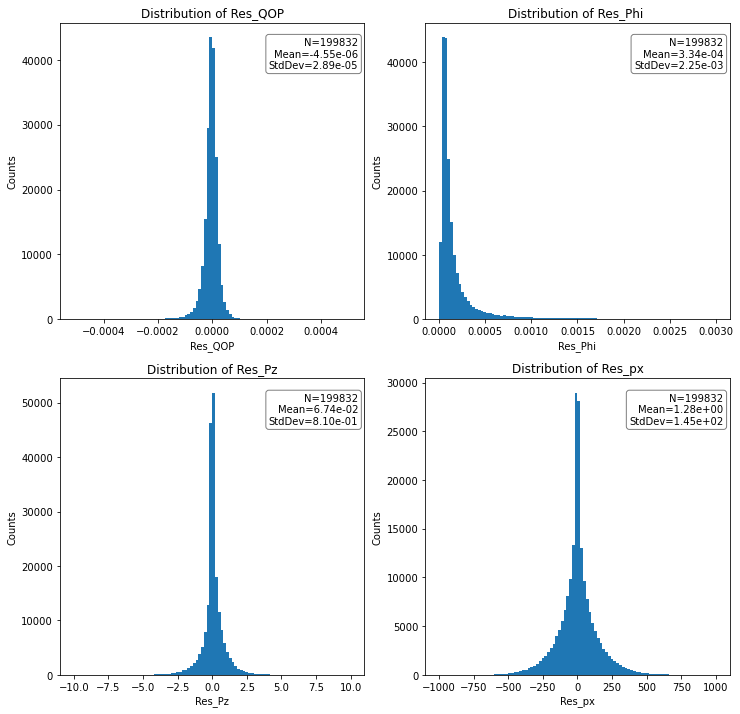

FASER2 (telescope) in the X axis with 0.2T Bz | 100 000 events simulated | Without Patch


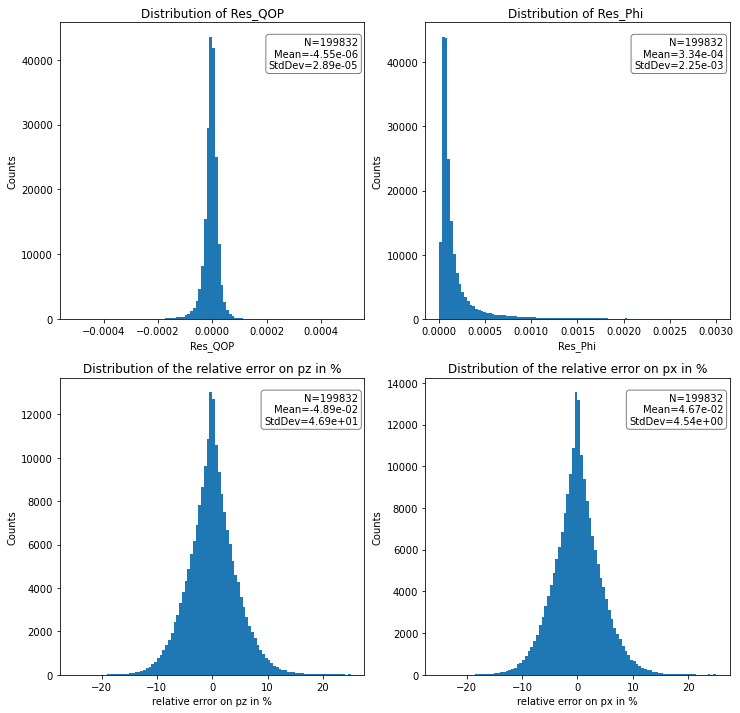

In [29]:
info="Default"
reco_analysis(path+'tracksummary_fitter_Default.root',PLOTS,INFO,ranges,info)

FASER2 (telescope) in the X axis with RestrictedBField 1T | Restricted BField 1T | 100 000 events simulated | Without Patch


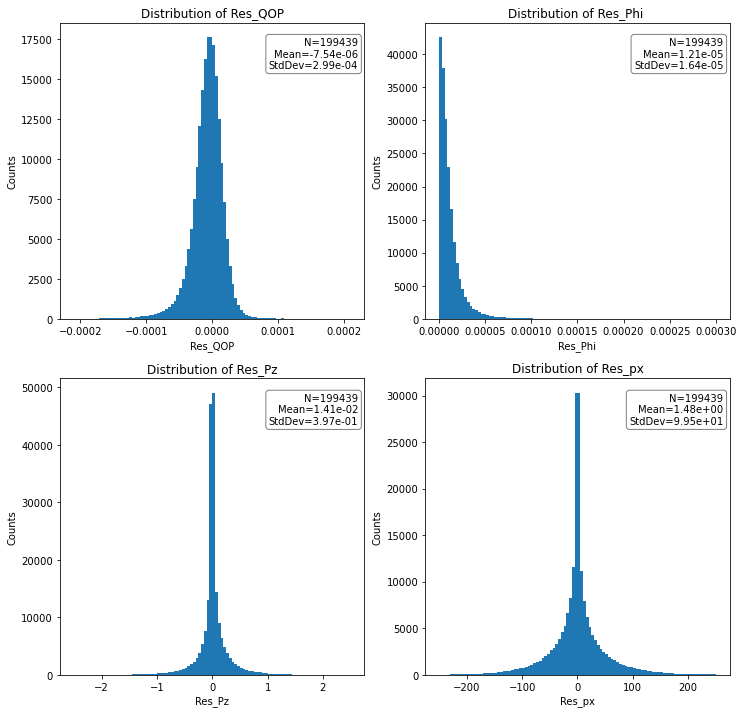

FASER2 (telescope) in the X axis with RestrictedBField 1T | 100 000 events simulated | Without Patch


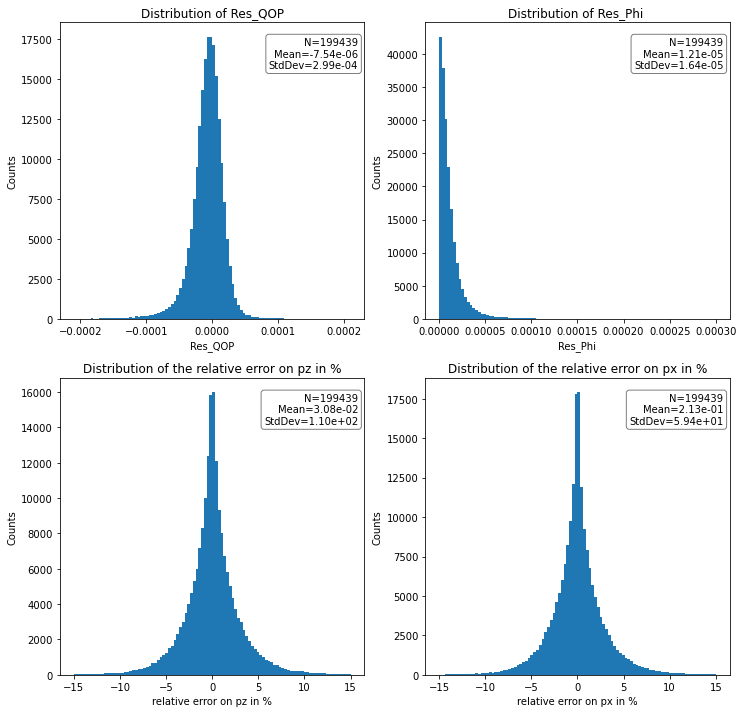

In [30]:

info="Restricted BField 1T"
reco_analysis(path_vertex+'tracksummary_fitter_vert.root',PLOTS,INFO_restrictedB,ranges_RB,info)

FASER2 (telescope) in the X axis with RestrictedBField | Restricted BField 1T | 100 000 events simulated | Vertex reconstruction Without Patch


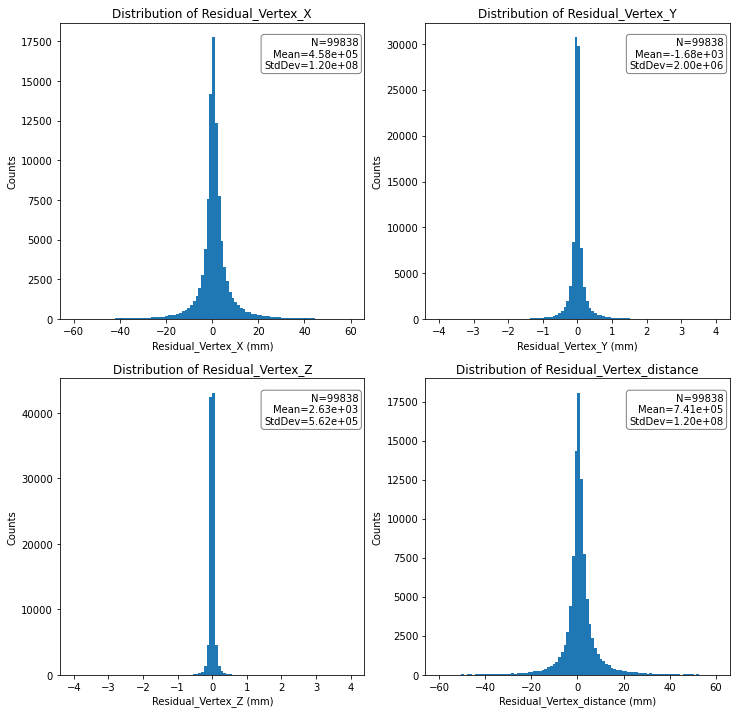

FASER2 (telescope) in the X axis with RestrictedBField | Restricted BField 1T | 100 000 events simulated | Vertex reconstruction Without Patch


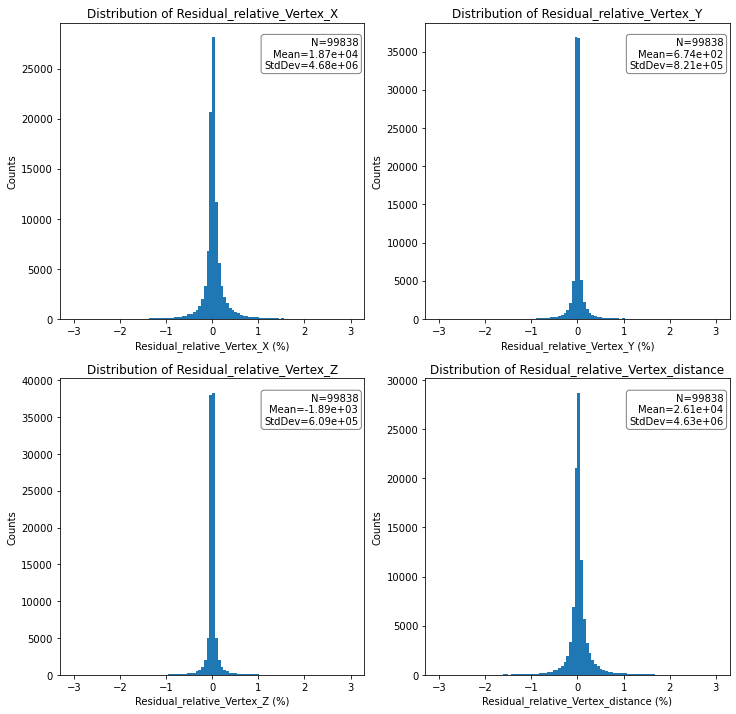

In [64]:
ranges_vertex = {
    'diffx_1d': (-60, 60),
    'diffy_1d': (-4, 4),
    'diffz_1d': (-4, 4),
    'Residual_distance_1d': (-60, 60),
    'diffx_rel_1d': (-3, 3),
    'diffy_rel_1d': (-3, 3),
    'diffz_rel_1d': (-3, 3),
    'Residual_distance_rel_1d': (-3, 3),
}

PLOTS_vertex = {
    'plot_residual': True,
    'plot_residual_relative_error': True,    
    'bin_number' : 100,
    'figSiz' : (12,12)
}

INFO_vertex= {
    'number_events':'100 000 events simulated',
    'Axis': 'X',
    'Patch': 'Vertex reconstruction Without Patch',
    'Field': "RestrictedBField",
    'Tel': "(telescope)",

}

info="Restricted BField 1T"
vertex_analysis(path_vertex+'performance_vertexing_vert.root',PLOTS_vertex,INFO_vertex,ranges_vertex,info)

FASER2 (telescope) in the X axis with RestrictedBField | Vertex Iterative | 100 000 events simulated | Vertex reconstruction Without Patch


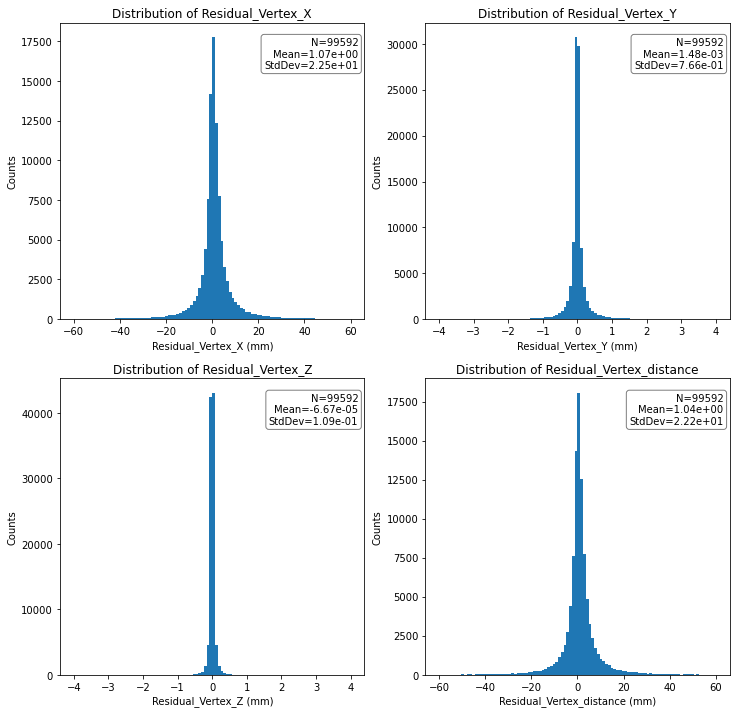

FASER2 (telescope) in the X axis with RestrictedBField | Vertex Iterative | 100 000 events simulated | Vertex reconstruction Without Patch


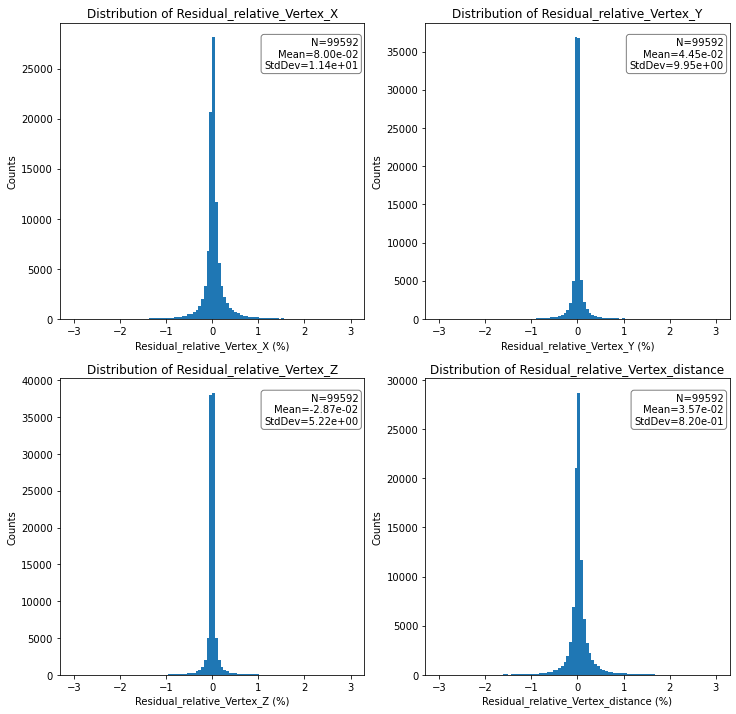

In [65]:
info="Vertex Iterative"
vertex_analysis(path_vertex+'performance_vertexing_VxIterative.root',PLOTS_vertex,INFO_vertex,ranges_vertex,info)

FASER2 (telescope) in the X axis with 0.2T Bz | Restricted BField 1T | 100 000 events simulated | Without Patch
[ 2.676243  -1.9132208  5.3772874 ...  2.461107   2.5625856 -2.2551877]


Text(0.98, 0.95, 'N=99838\nMean=7.41e+05\nStdDev=1.20e+08')

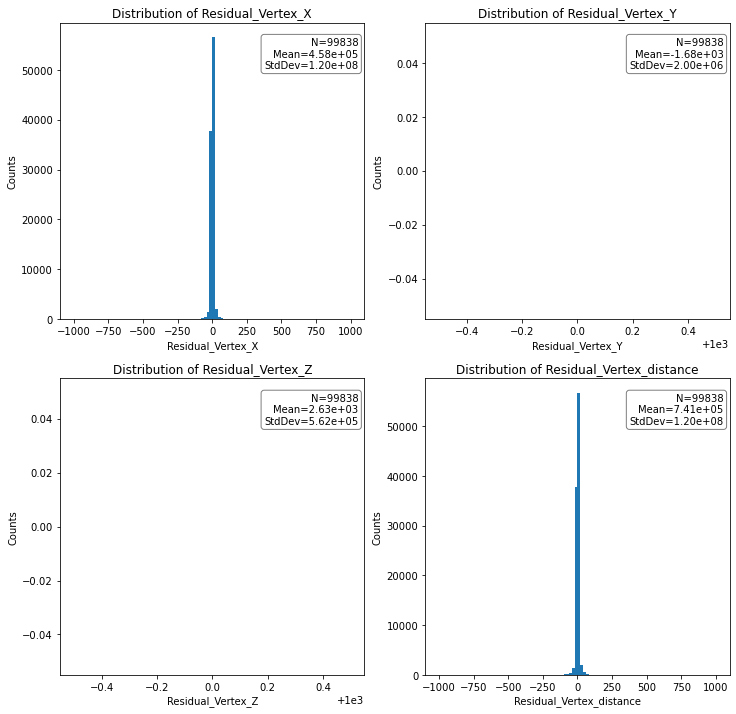

In [51]:
    file = uproot.open(path_vertex+'performance_vertexing_vert.root')
    tree = file["vertexing"]    
    
#    event_nr = tree.array("event_nr")
    diffx = tree.array("diffx")
    diffy = tree.array("diffy")
    diffz = tree.array("diffz")
    truthX = tree.array("truthX")
    truthY = tree.array("truthY")
    truthZ = tree.array("truthZ")
    recoX = tree.array("recoX")
    recoY = tree.array("recoY")
    recoZ = tree.array("recoZ")
    covXX = tree.array("covXX")
    covYY = tree.array("covYY")
    covXY = tree.array("covXY")
    covYX = tree.array("covYX")
    trackVtxMatchFraction = tree.array("trkVtxMatch")
    nrecoVtx = tree.array("nRecoVtx")
    ntrueVtx = tree.array("nTrueVtx")
    nVtxDetAcceptance = tree.array("nVtxDetectorAcceptance")
    nVtxReconstructable = tree.array("nVtxReconstructable")
    timeMS = tree.array("timeMS")
    
    
    #Calcculate new variables
    
    
    truth_distance=np.sqrt(truthX**2+truthY**2+truthZ**2)
    reco_distance=np.sqrt(recoX**2+recoY**2+recoZ**2)
    Residual_distance=reco_distance-truth_distance
    
    Residual_distance_rel=100*(reco_distance-truth_distance)/truth_distance
    
    diffx_rel=100*diffx/truthX
    diffy_rel=100*diffy/truthY
    diffz_rel=100*diffz/truthZ
    
    
    
    
    diffx_1d = diffx.flatten()
    diffy_1d = diffy.flatten()
    diffz_1d = diffz.flatten()

    truthX_1d = truthX.flatten()
    truthY_1d = truthY.flatten()
    truthZ_1d = truthZ.flatten()

    recoX_1d = recoX.flatten()
    recoY_1d = recoY.flatten()
    recoZ_1d = recoZ.flatten()

    covXX_1d = covXX.flatten()
    covYY_1d = covYY.flatten()
    covXY_1d = covXY.flatten()
    covYX_1d = covYX.flatten()
    trackVtxMatchFraction_1d = trackVtxMatchFraction.flatten()
    
    truth_distance_1d=truth_distance.flatten()
    reco_distance_1d=reco_distance.flatten()
    Residual_distance_1d=Residual_distance.flatten()
    
    
    diffx_rel_1d = diffx_rel.flatten()
    diffy_rel_1d = diffy_rel.flatten()
    diffz_rel_1d = diffz_rel.flatten()
    Residual_distance_rel_1d=Residual_distance_rel.flatten()
    
   # Calculate mean and standard deviation of diffx_1d
    diffx_mean = np.mean(diffx_1d)
    diffx_std = np.std(diffx_1d)

    # Calculate mean and standard deviation of diffy_1d
    diffy_mean = np.mean(diffy_1d)
    diffy_std = np.std(diffy_1d)

    # Calculate mean and standard deviation of diffz_1d
    diffz_mean = np.mean(diffz_1d)
    diffz_std = np.std(diffz_1d)
    
    Residual_distance_mean = np.mean(Residual_distance_1d)
    Residual_distance_std = np.std(Residual_distance_1d)
    
    Residual_distance_rel_mean = np.mean(Residual_distance_rel_1d)
    Residual_distance_rel_std = np.std(Residual_distance_rel_1d)
    
    # Calculate mean and standard deviation of diffx_1d relative error
    diffx_rel_mean = np.mean(diffx_rel_1d)
    diffx_rel_std = np.std(diffx_rel_1d)
    diffy_rel_mean = np.mean(diffy_rel_1d)
    diffy_rel_std = np.std(diffy_rel_1d)
    diffz_rel_mean = np.mean(diffz_rel_1d)
    diffz_rel_std = np.std(diffz_rel_1d)
    
    fig, axs = plt.subplots(2, 2, figsize=PLOTS['figSiz'])
    print("FASER2 " + INFO['Tel'] + " in the " +INFO['Axis']+ " axis with " +INFO['Field']+ " | " +info+" | "+INFO['number_events']+ " | " + INFO['Patch'] )

    print(diffx_1d)
    n, bins, patches = axs[0,0].hist(diffx_1d, bins=PLOTS['bin_number'], range=ranges_vertex['diffx_1d'])
    axs[0,0].set_xlabel("Residual_Vertex_X")
    axs[0,0].set_ylabel("Counts")
    axs[0,0].set_title("Distribution of Residual_Vertex_X")

    text_Vertex_X = f"N={len(diffx_1d)}\nMean={diffx_mean:.2e}\nStdDev={diffx_std:.2e}"
    props_Vertex_X = dict(boxstyle='round', facecolor='white', alpha=0.5)
    axs[0,0].text(0.98, 0.95, text_Vertex_X, transform=axs[0,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_X)

    n, bins, patches = axs[0,1].hist(diffy_1d, bins=PLOTS['bin_number'], range=ranges_vertex['diffy_1d'])
    axs[0,1].set_xlabel("Residual_Vertex_Y")
    axs[0,1].set_ylabel("Counts")
    axs[0,1].set_title("Distribution of Residual_Vertex_Y")

    text_Vertex_Y = f"N={len(diffy_1d)}\nMean={diffy_mean:.2e}\nStdDev={diffy_std:.2e}"
    props_Vertex_Y = dict(boxstyle='round', facecolor='white', alpha=0.5)
    axs[0,1].text(0.98, 0.95, text_Vertex_Y, transform=axs[0,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_Y)

    n, bins, patches = axs[1,0].hist(diffz_1d, bins=PLOTS['bin_number'], range=ranges_vertex['diffz_1d'])
    axs[1,0].set_xlabel("Residual_Vertex_Z")
    axs[1,0].set_ylabel("Counts")
    axs[1,0].set_title("Distribution of Residual_Vertex_Z")

    text_Vertex_Z = f"N={len(diffz_1d)}\nMean={diffz_mean:.2e}\nStdDev={diffz_std:.2e}"
    props_Vertex_Z = dict(boxstyle='round', facecolor='white', alpha=0.5)
    axs[1,0].text(0.98, 0.95, text_Vertex_Z, transform=axs[1,0].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_Z)


    n, bins, patches = axs[1,1].hist(Residual_distance_1d, bins=PLOTS['bin_number'], range=ranges_vertex['Residual_distance_1d'])
    axs[1,1].set_xlabel("Residual_Vertex_distance")
    axs[1,1].set_ylabel("Counts")
    axs[1,1].set_title("Distribution of Residual_Vertex_distance")

    text_Vertex_distance = f"N={len(Residual_distance_1d)}\nMean={Residual_distance_mean:.2e}\nStdDev={Residual_distance_std:.2e}"
    props_Vertex_distance = dict(boxstyle='round', facecolor='white', alpha=0.5)
    axs[1,1].text(0.98, 0.95, text_Vertex_distance, transform=axs[1,1].transAxes, ha='right', va='top', fontsize=10, bbox=props_Vertex_distance)

In [52]:
print(diffy_1d)

[-0.03576723  0.07629129 -0.16853149 ... -0.03233835 -0.07975836
  0.12344566]
